In [1]:
from google.colab import files
files.upload()

Saving titanic.zip to titanic.zip


{'titanic.zip': b'PK\x03\x04-\x00\x00\x00\x08\x00v\x81\x82S\xf6VPR\xff\xff\xff\xff\xff\xff\xff\xff\n\x00\x14\x00tested.csv\x01\x00\x10\x00"s\x00\x00\x00\x00\x00\x00\\,\x00\x00\x00\x00\x00\x00\x8d}\xd9r\xe3H\x92\xed\xfb5\xbb\xff\x00\xd3K\xab\xcdX, \xb0?\x92\xd4\x96\x99\xdaJLK\xd9\xcc[\x88\x0c\x91(\x81\x80\n \x95\xa5\xfc\xfaq\x8fp\x8f\x85RM\xcf\xb4\xd5twu!\x18\x8b/\xc7\x8f/y/\xc7Qu\x1b5|YO\x96\x87\xe1\xadyS\xeb\xc9\xfd\xaa\x85\xbf=\xb9\x95;5Y\xaa\xbf\'\xb3\r\xfc{\xf3\xb4|\x9d\xdc\xcba\xb5\x9d|oV/j?\xb9\x90\x83\x9a,\xe4S\xd3M\xcewOrxQ\xeb\xff\xff\xff\xaaZL\xe2I:9\xf9\xa6\xda\xf6}\x12\xdd\x0c\xd3\xe8+,4\x9eLv\xb2U\x934\x9b\xe6\xf0\x0f\xc0?\x92\xc6u\x92L\xcai%\xe0\x93\xc9\x1f\xf8i:I\xf0\xd3\xc7\xa6}Q#~;\xd2\xc7\xd1\xe9y\xdb\xaa.\xbaUj=\xfe\xfbd\xf2\xac\xf4bY\t\x1f\xc0RE*J1)\'\x93%\xae\x92\xc1\xdf\x12\x93\x93\x9b\xf7\xd6,2\x8d\xbeo\xfb\x9d\x1c\xa3\x8bAv\xab\x86wR\x08\xbd\x0f\x91\xc5\xa2,&\xf5\xb4\xa8\xca\x9c\xf6\x91\x9b#<6\xc3/\xb3\xc0\xac}R\xc3\x9e>\x14\xa59@\x92\'y6\xa9\xa6E!r\xfa\xe9\xc2\

In [2]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat './kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
!kaggle competitions download -c titanic

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [4]:
! unzip '/content/titanic.zip'

Archive:  /content/titanic.zip
  inflating: tested.csv              


In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [6]:
df = pd.read_csv('/content/tested.csv')

In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# visulation


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
df.shape

(418, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


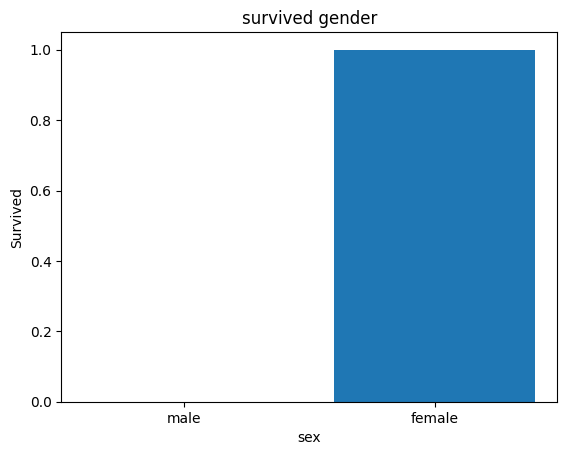

In [12]:
plt.bar(df["Sex"], df["Survived"])
plt.title('survived gender')
plt.xlabel('sex')
plt.ylabel('Survived')
plt.show()

In [13]:
survived_female=df.loc[(df["Survived"]==0) & (df["Sex"]=="female")].value_counts()
survived_female

Series([], dtype: int64)

In [14]:
survived_female=df.loc[(df["Survived"]==1) & (df["Sex"]=="female")].value_counts()
survived_female

PassengerId  Survived  Pclass  Name                                                             Sex     Age   SibSp  Parch  Ticket       Fare      Cabin            Embarked
904          1         1       Snyder, Mrs. John Pillsbury (Nelle Stevenson)                    female  23.0  1      0      21228        82.2667   B45              S           1
906          1         1       Chaffee, Mrs. Herbert Fuller (Carrie Constance Toogood)          female  47.0  1      0      W.E.P. 5734  61.1750   E31              S           1
1100         1         1       Rosenbaum, Miss. Edith Louise                                    female  33.0  0      0      PC 17613     27.7208   A11              C           1
1110         1         1       Widener, Mrs. George Dunton (Eleanor Elkins)                     female  50.0  1      1      113503       211.5000  C80              C           1
1114         1         2       Cook, Mrs. (Selena Rogers)                                       female  22.0  0    

In [15]:
survived_male=df.loc[(df["Survived"]==0) & (df["Sex"]=="male")].value_counts()
survived_male

PassengerId  Survived  Pclass  Name                                          Sex   Age   SibSp  Parch  Ticket         Fare      Cabin            Embarked
920          0         1       Brady, Mr. John Bertram                       male  41.0  0      0      113054         30.5000   A21              S           1
1213         0         3       Krekorian, Mr. Neshan                         male  25.0  0      0      2654           7.2292    F E57            C           1
1137         0         1       Kenyon, Mr. Frederick R                       male  41.0  1      0      17464          51.8625   D21              S           1
1144         0         1       Clark, Mr. Walter Miller                      male  27.0  1      0      13508          136.7792  C89              C           1
1162         0         1       McCaffry, Mr. Thomas Francis                  male  46.0  0      0      13050          75.2417   C6               C           1
1179         0         1       Snyder, Mr. John Pil

In [16]:
survived_male=df.loc[(df["Survived"]==1) & (df["Sex"]=="male")].value_counts()
survived_male

Series([], dtype: int64)

In [17]:
df['age_range'] = pd.cut(df['Age'], bins=[17, 27, 37, 47, 57, 67], labels=['17-27', '28-37', '38-47', '48-57', '58-67'])

In [18]:
age_range = df.groupby('age_range')['Age'].count()
age_range

age_range
17-27    126
28-37     73
38-47     48
48-57     28
58-67     15
Name: Age, dtype: int64

In [19]:
df['age_range'].dtype

CategoricalDtype(categories=['17-27', '28-37', '38-47', '48-57', '58-67'], ordered=True)

In [20]:
age_survived_female=df.loc[df["Survived"]==1]["age_range"]
age_survived_female

1      38-47
4      17-27
6      28-37
8      17-27
12     17-27
       ...  
409      NaN
410      NaN
411    28-37
412    28-37
414    38-47
Name: age_range, Length: 152, dtype: category
Categories (5, object): ['17-27' < '28-37' < '38-47' < '48-57' < '58-67']

In [21]:
age_survived_female=age_survived_female.dropna()
age_survived_female

1      38-47
4      17-27
6      28-37
8      17-27
12     17-27
       ...  
400    28-37
402    17-27
411    28-37
412    28-37
414    38-47
Name: age_range, Length: 109, dtype: category
Categories (5, object): ['17-27' < '28-37' < '38-47' < '48-57' < '58-67']

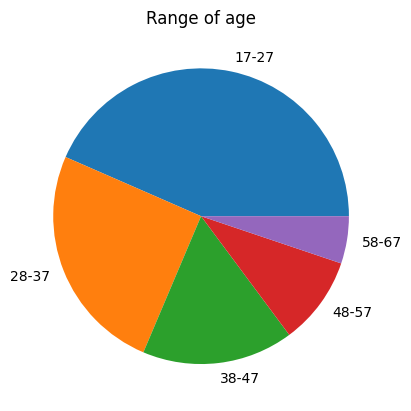

In [22]:
labels=['17-27', '28-37', '38-47', '48-57', '58-67']
plt.pie(age_range, labels = labels)
plt.title('Range of age')
plt.show()

In [23]:
Embarked_Q=df[(df["Embarked"]=="Q") & df["Survived"]==1].value_counts().count()

In [24]:
Embarked_S=df[(df["Embarked"]=="S") & df["Survived"]==1].value_counts().count()

In [25]:
Embarked_C=df[(df["Embarked"]=="C") & df["Survived"]==1].value_counts().count()

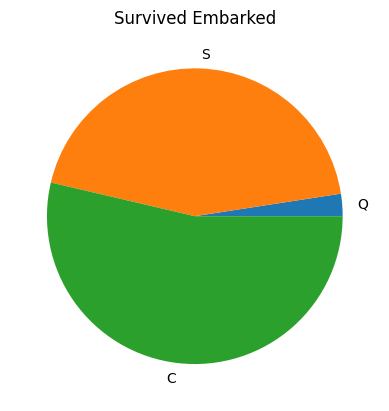

In [26]:
embarked=[Embarked_Q,Embarked_S,Embarked_C]
labels=['Q','S','C']
plt.pie(embarked, labels = labels)
plt.title('Survived Embarked')
plt.show()

In [27]:
pclass1=df[(df["Pclass"]==1) & df["Survived"]==1].value_counts().count()

In [28]:
pclass2=df[(df["Pclass"]==2) & df["Survived"]==1].value_counts().count()

In [29]:
pclass3=df[(df["Pclass"]==3) & df["Survived"]==1].value_counts().count()

In [30]:
survived=df[df["Survived"]==1].value_counts().count()

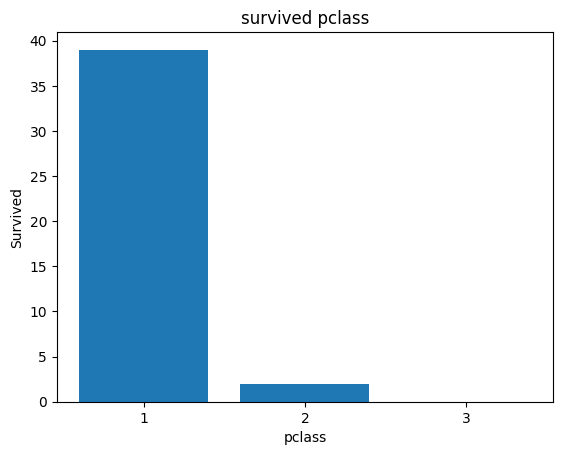

In [31]:
pclass=[pclass1,pclass2,pclass3]
labels=['1','2','3']
plt.bar(labels, pclass)
plt.title('survived pclass')
plt.xlabel('pclass')
plt.ylabel('Survived')
plt.show()

In [32]:
pclass1=df[(df["Pclass"]==1) & df["Survived"]==0].value_counts().count()

In [33]:
pclass2=df[(df["Pclass"]==2) & df["Survived"]==0].value_counts().count()

In [34]:
pclass3=df[(df["Pclass"]==3) & df["Survived"]==0].value_counts().count()

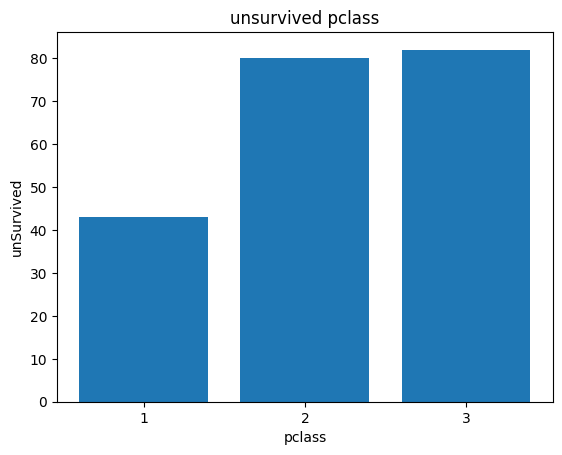

In [35]:
pclass=[pclass1,pclass2,pclass3]
labels=['1','2','3']
plt.bar(labels, pclass)
plt.title('unsurvived pclass')
plt.xlabel('pclass')
plt.ylabel('unSurvived')
plt.show()

<ipython-input-36-82be490feaeb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().round(2)


<Axes: >

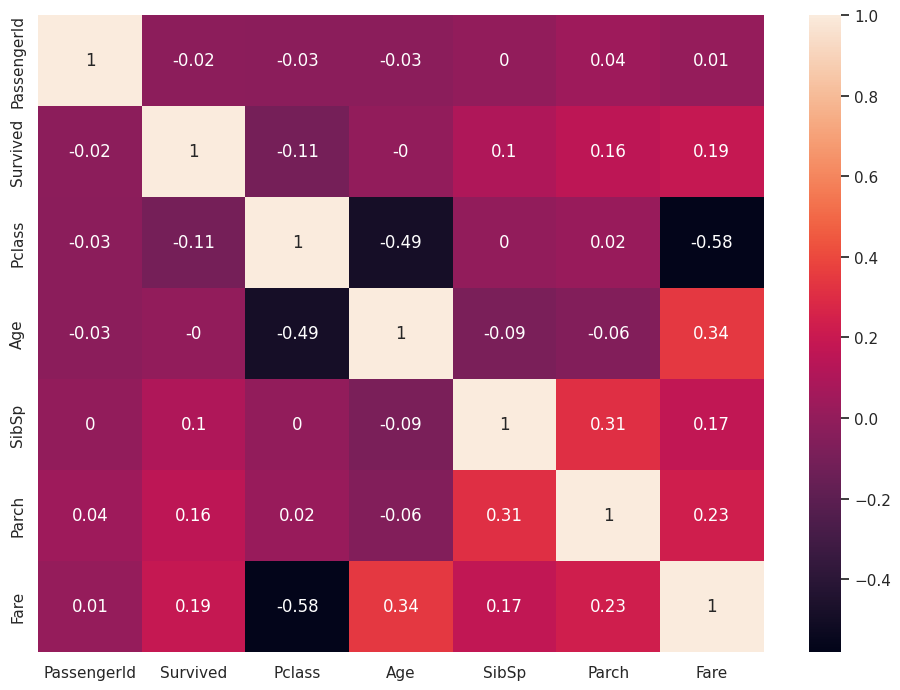

In [36]:
correlation_matrix = df.corr().round(2)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data=correlation_matrix, annot=True)

In [37]:
df=df.dropna()

In [38]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_range
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S,17-27
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S,38-47
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,48-57
26,918,1,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C,17-27
28,920,0,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S,38-47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,1296,0,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C,38-47
405,1297,0,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C,17-27
407,1299,0,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C,48-57
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q,28-37


In [39]:
df['Embarked'] = df['Embarked'].astype('category')
df["Embarked"] = df["Embarked"].cat.codes

<ipython-input-39-9ddfebdd82e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Embarked'] = df['Embarked'].astype('category')
<ipython-input-39-9ddfebdd82e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Embarked"] = df["Embarked"].cat.codes


In [40]:
df['Sex'] = df['Sex'].astype('category')
df["Sex"] = df["Sex"].cat.codes

<ipython-input-40-555c832f0ac1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].astype('category')
<ipython-input-40-555c832f0ac1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sex"] = df["Sex"].cat.codes


In [41]:
df['Pclass'] = df['Pclass'].astype('category')
df["Pclass"] = df["Pclass"].cat.codes

<ipython-input-41-1f9554331f41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pclass'] = df['Pclass'].astype('category')
<ipython-input-41-1f9554331f41>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Pclass"] = df["Pclass"].cat.codes


In [42]:
y = df['Survived']
x = df[['Embarked', 'Age','Sex','Pclass','Fare']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=None)

In [43]:
model = linear_model.LogisticRegression().fit(x_train, y_train)

In [50]:
Y_pred = model.predict(x_train)
Y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1])

In [51]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1])

In [48]:
metrics.accuracy_score(y_train, Y_pred)

1.0

In [49]:
metrics.accuracy_score(y_test, y_pred)

1.0